# Disclaimer for mathematicians: the contents of this lecture are anything but rigorous

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from IPython.display import Image, display

# Some history

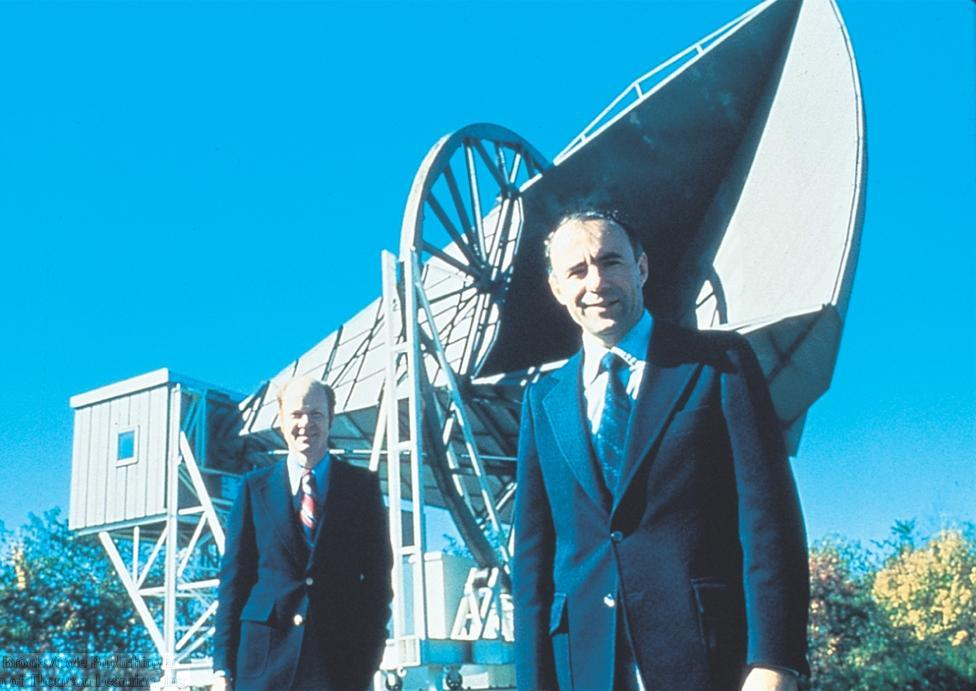

In [3]:
display(Image(filename="penzias_wilson.jpg"))

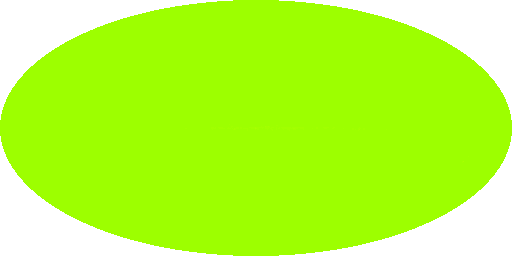

In [5]:
display(Image(filename="cmb.png"))

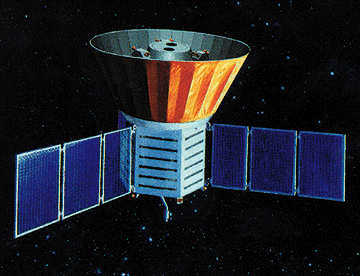

In [6]:
display(Image(filename="COBE.png"))

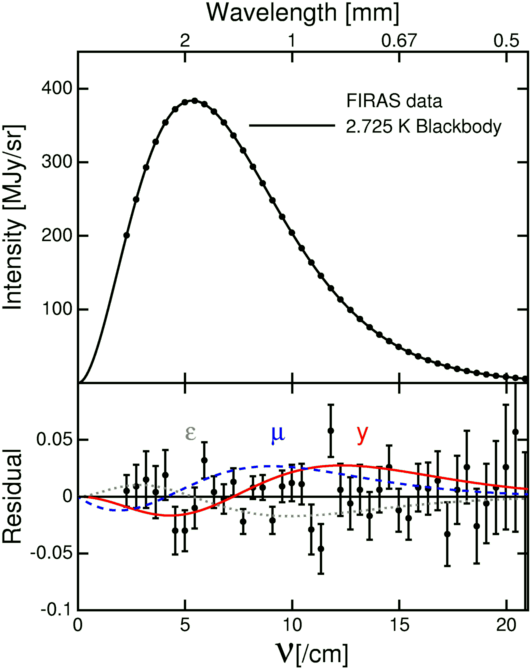

In [7]:
display(Image(filename="cmbspect.png"))

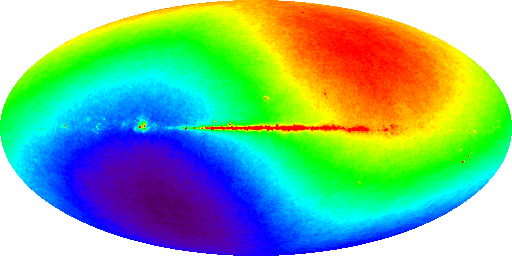

In [8]:
display(Image(filename="cmb_delta3.png"))

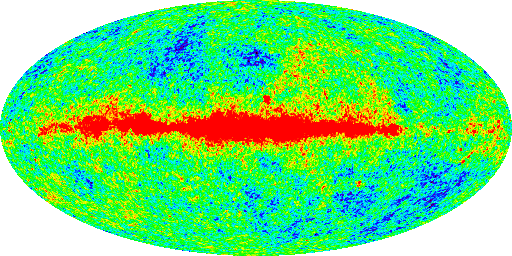

In [9]:
display(Image(filename="cmb_delta5.png"))

# Waves and Fourier series

This is a wave

$f(x)=Asin(nx+\phi)$

$A$ is the amplitude, $n$ determines the frequency and $\phi$ gives the phase 

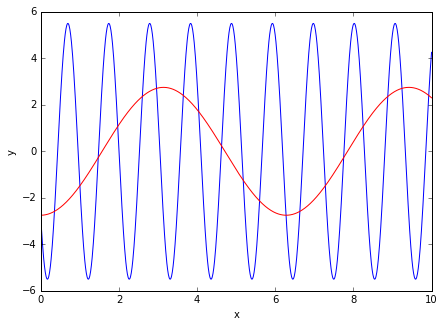

In [14]:
# Let's compute a sinusoidal wave
x = np.linspace(0,10,1000)
a = 5.5
n = 6.0
phi = 10.0
y = a * np.sin(n*x + phi)
y2 = a/2 * np.sin(n/6*x + phi+1)

# Plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.plot(x,y2,'r')
ax.set_xlabel('x')
ax.set_ylabel('y')

When x has units, the frequency determines the scale in which the wave changes, the higher n, the smaller the scales in which the wave changes significantly

If $f_1$ and $f_2$ are solutions of a linear equation, so is any linear combination of both. Also, a linear combination of waves is another wave. This is another wave (not harmonic, since it has more than one frequence):

$f(x) = \sum_n A_n sin(k_n x + \phi_n)$

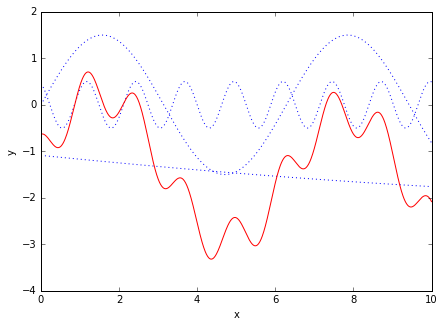

In [15]:
# We can also add waves linearly and get another wave
x = np.linspace(0,10,1000)
An   = [1.5, 2.0, 0.5]
kn   = [1.0, 0.05, 5.0]
phin = [0.0, 10.0, 2.0]
y = [An[i]*np.sin(kn[i]*x+phin[i]) for i in range(len(An))]
ytot = np.sum(y,axis=0)
# Plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
for i in range(len(An)):
    ax.plot(x,y[i],'b:')
ax.plot(x,ytot,'r-')
ax.set_xlabel('x')
ax.set_ylabel('y')

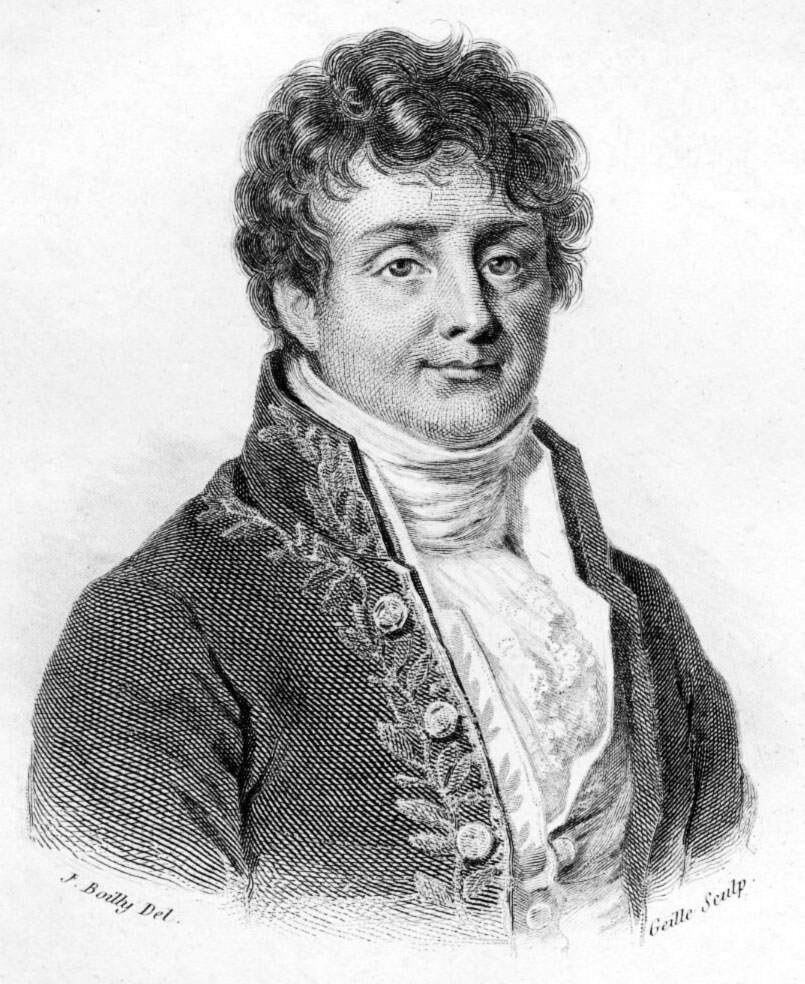

In [13]:
Image("fourier.jpg")

Turns out functions can also be thought of as vectors, in the sense that the linear combination of 2 functions is also a function. The same way we can express vectors as a linear combination of a set of "basis" vectors (i.e. give their coordinates), we can do the same with functions. Remember:

$\bar{v} = \sum_{i}v_i \bar{u}^i$

In the case of functions, we have also functional basis. Fourier discovered that trigonometric functions (sines and cosines) can act a a basis, and it is possible to write any function (with some conditions), as a linear combination of those (although with an infinte number of terms):

$f(x) = \frac{A_0}{2}+\sum_{n}A_n sin(k_n x + \phi_n)$

That is, we can decompose a function into a series of waves, each capturing the variation of the function at different scales.

Let's forget for a moment about the phases, if we want to get the coefficients, we need to project the function (vector) onto the basis. In this new vectorial space, the dot product is an integral:

$A_n(k_n) \propto \int_{0}^{P}f(x)sin(k_n x)$

These coefficients ("coordinates") tell us how important are the contributions from different scales

# Fourier transformations

We can extend to a certain extent the idea of a Fourier series into a continuum set of scales, which leads us to a fourier transformation:

$\hat{f}(k) = \int_{0}^{L}dxf(x)sin(kx)$

This function of "k" can be thought as the continuous limit of the series of coefficients ("coordinates") of the Fourier series, and thus tells us which scales are relevant for describing the changes of our function

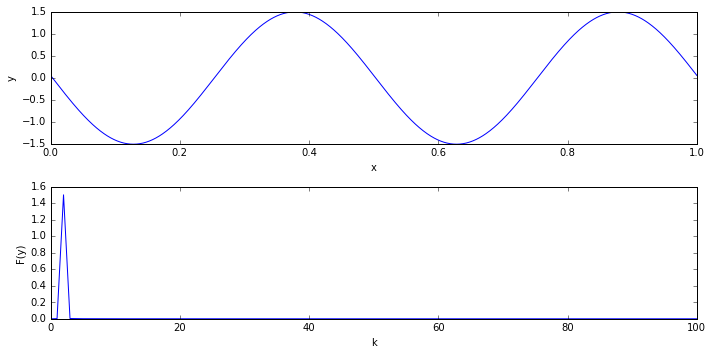

In [46]:
# Let's define our domain
Period  = 1.0
Npoints = 1000
N = Npoints
Spacing = Period/Npoints

# Let's pick a harmonic wave
x = np.linspace(0,Period,Npoints)
a = 1.5
n = 2
phi = 78.5
y = a * np.sin(n*2.0*np.pi*x + phi)
# And compute its Fourier transform
Fy = np.fft.fft(y)
k  = np.linspace(0,1.0/(2.0*Spacing),Npoints/2)

# Plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(212)
ax.plot(k,2.0/N*np.abs(Fy[0:Npoints/2]))
ax.set_xlim([0,100])
ax.set_xlabel('k')
ax.set_ylabel('F(y)')

plt.tight_layout()

The Fourier transform gives us information on how important are the contributions of different scales (waves)

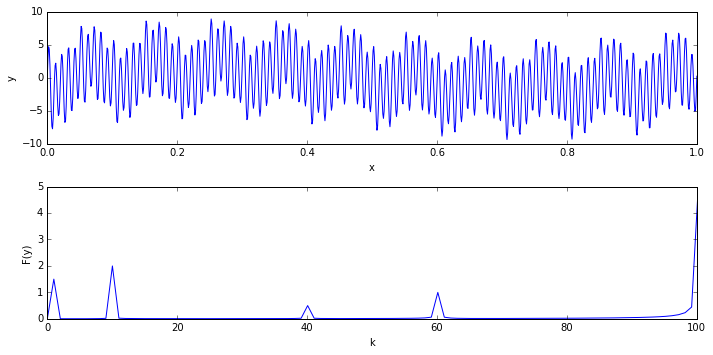

In [18]:
# Let's define our domain
Period  = 1.0
Npoints = 1000
N = Npoints
Spacing = Period/Npoints

# Let's combine some waves
x = np.linspace(0,Period,Npoints)
An   = [1.5, 2.0, 0.5, 1.0, 5.0]
kn   = [1.0, 10, 40.0, 60, 100.0]
phin = [0.0, 10.0, 2.0, 20.0, 0.0]
y = [An[i]*np.sin(2.0*np.pi*kn[i]*x+phin[i]) for i in range(len(An))]
ytot = np.sum(y,axis=0)
# And compute its Fourier transform
Fy = np.fft.fft(ytot)
k  = np.linspace(0,1.0/(2.0*Spacing),Npoints/2)

# Plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
ax.plot(x,ytot)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(212)
ax.plot(k,2.0/N*np.abs(Fy[0:Npoints/2]))
ax.set_xlim([0,100])
ax.set_xlabel('k')
ax.set_ylabel('F(y)')

plt.tight_layout()

And we can do this for any function

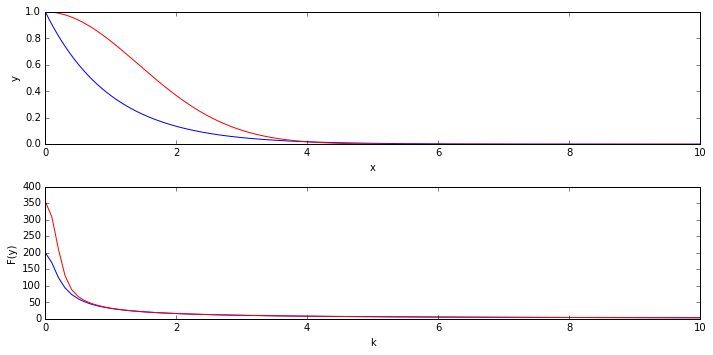

In [32]:
# Let's define our domain
Period  = 10.0
Npoints = 1000000
Spacing = Period/Npoints

# Let's combine some waves
x = np.linspace(0,Period,Npoints)

#y = 5.0 * x
#y2 = -((x-0.5)/10.0)**2
#y = 2.0 * x**2.0
y = np.exp(-x)
y2 = np.exp(-x**2/4.0)

# And compute its Fourier transform
Fy = np.fft.fft(y)
Fy2 = np.fft.fft(y2)

k  = np.linspace(0,1.0/(2.0*Spacing),Npoints/2)

# Plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
ax.plot(x,y)
ax.plot(x,y2, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(212)
ax.plot(k,2.0/N*np.abs(Fy[0:Npoints/2]))
ax.plot(k,2.0/N*np.abs(Fy2[0:Npoints/2]),'r')
ax.set_xlim([0,10])
ax.set_xlabel('k')
ax.set_ylabel('F(y)')

plt.tight_layout()

Not only that, but we can also exten this analysis to more than one dimension. We can decompose 2D functions in 2D wawes, and do a 2D Fourier tranform. Now each wave needs to wave numbers, which define a wave vector:

$f(x) = A * sin(k_x x + k_y y)$

And similarly, the Fourier transform can be defined in 2D. If we center it, the closer to the center the largest the scale:

$\hat{f}(k_x,k_y) \propto \int_{0}^{L_x}dx \int_{0}^{L_y}dy f(x,y) sin(k_x x + k_y y)$

(100, 100) <type 'numpy.ndarray'>


(-0.5, 99.5, 99.5, -0.5)

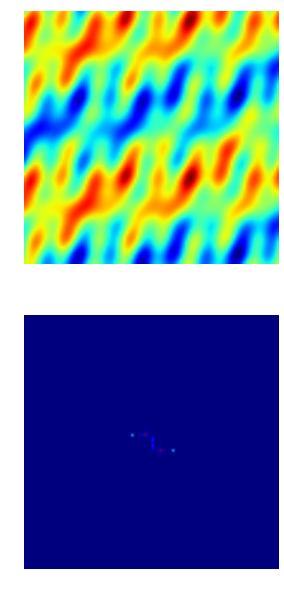

In [41]:
# Let's define our domain
Period  = 1.0
Npoints = 100
Spacing = Period/Npoints

x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))

# Add some waves
A = [1.0, 2.0, 1.0, 5.0, 3.0, -4.0]
kx = [0.0, 50.0, 0.0, 2.0, 50.0, -20.0]
ky = [50.0, 0.0, 10.0, 10.0, 20.0, -20.0]
z_comp = [A[i]*np.sin(kx[i]*x+ky[i]*y) for i in range(len(A))]
ztot = np.sum(z_comp,axis=0)

# Compute their Fourier transform
Fztot = np.fft.fft2(ztot)
Fztot = np.fft.fftshift(Fztot)
print np.shape(Fztot), type(Fztot)

# Plot
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
ax.imshow(ztot)
ax.axis('off')

ax = fig.add_subplot(212)
ax.imshow(np.real(Fztot)**2)
ax.axis('off')

(100, 100) <type 'numpy.ndarray'>


(-0.5, 99.5, 99.5, -0.5)

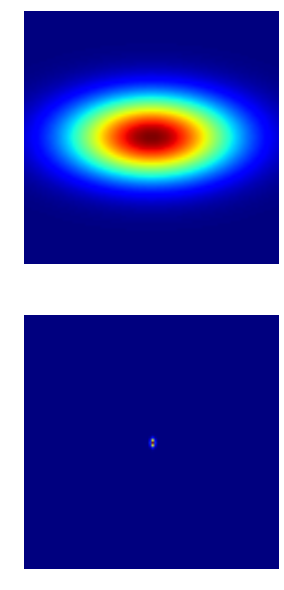

In [45]:
# Let's define our domain
Period  = 5.0
Npoints = 100
Spacing = Period/Npoints

x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))

# Add some waves

ztot = np.exp(-((2*(x-2.5))**2+(4*(y-2.5))**2)/10.0)

# Compute their Fourier transform
Fztot = np.fft.fft2(ztot)
Fztot = np.fft.fftshift(Fztot)
print np.shape(Fztot), type(Fztot)

# Plot
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
ax.imshow(ztot)
ax.axis('off')

ax = fig.add_subplot(212)
ax.imshow(np.real(Fztot)**2.0)
ax.axis('off')

# Spherical harmonics

The sky is not flat, nor a rectangle, but a sphere in which center we're placed. There is a better basis of functions to decompose a field defined on a surface, and those are the spherical harmonics:

$$f(\hat{n})=\sum_{l=0}^{\infty} \sum_{m=-l}^{l} a_{lm} Y_{lm}(\hat{n})$$

where $\hat{n}$ is a unit vector indicating the direction (so, has 2 angles into it, latitude and azimuth):

$Y_{lm}(\theta,\phi) = \sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}P_l^m(\theta)e^{im\phi}$

where $P_l^m$ are the associated Legendre polynomials

$P_0^0(x)=1, P_1^0(x)=x, ...$



Let's see how these polynomials look like

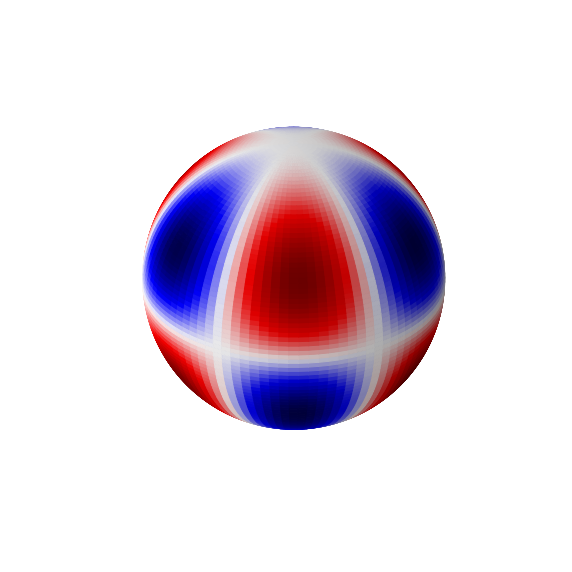

In [58]:
# We need to define some angles on the sky to cover it
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# We need to define which spherical harmonic we want to visualize
m, l = 1, 0
m, l = 3, 4
#m, l = 2, 10

#m, l = 10, 20

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

Usually we do not represent the CMB as a sphere seen from outside, but we use the Babinet projection, which is a representation for a spherical surface that preservers ratios in areas, and thus is adequate to give an idea of how perturbations distribute on different scales

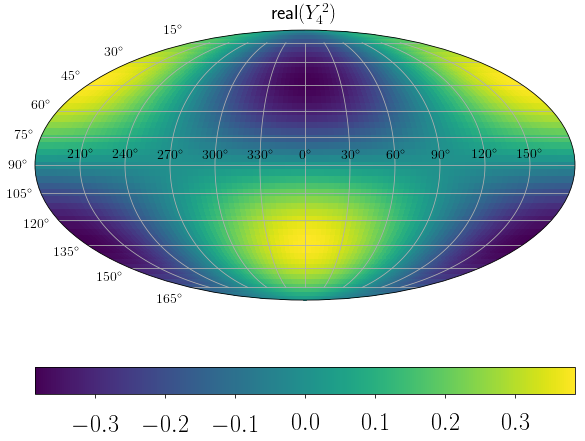

In [5]:
# We may want to see it in the typical projection we use for our CMB maps
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# Coordinate arrays for the graphical representation
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi/2, np.pi/2, 50)
X, Y = np.meshgrid(x, y)

# Spherical coordinate arrays derived from x, y
# Necessary conversions to get Mollweide right
phi = x.copy()    # physical copy
phi[x < 0] = 2 * np.pi + x[x<0]
theta = np.pi/2 - y
PHI, THETA = np.meshgrid(phi, theta)

# Let's define the multipoles we will show
m, l = 1,1
m, l = 1,2
#m, l = 2,4
#m, l = 5,20
SH_SP = sph_harm(m, l, PHI, THETA).real    # Plot just the real part


xlabels = ['$210^\circ$', '$240^\circ$','$270^\circ$','$300^\circ$','$330^\circ$',
           '$0^\circ$', '$30^\circ$', '$60^\circ$', '$90^\circ$','$120^\circ$', '$150^\circ$']

ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
           '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
           '$45^\circ$','$30^\circ$','$15^\circ$']

fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y , SH_SP)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
#ax.set_xlabel(r'$\boldsymbol \phi$', fontsize=20)

#ax.set_ylabel(r'$\boldsymbol{\theta}$', fontsize=20)
ax.grid()
fig.colorbar(im, orientation='horizontal');

Now we can see how these functions provide a way to analyze something like this

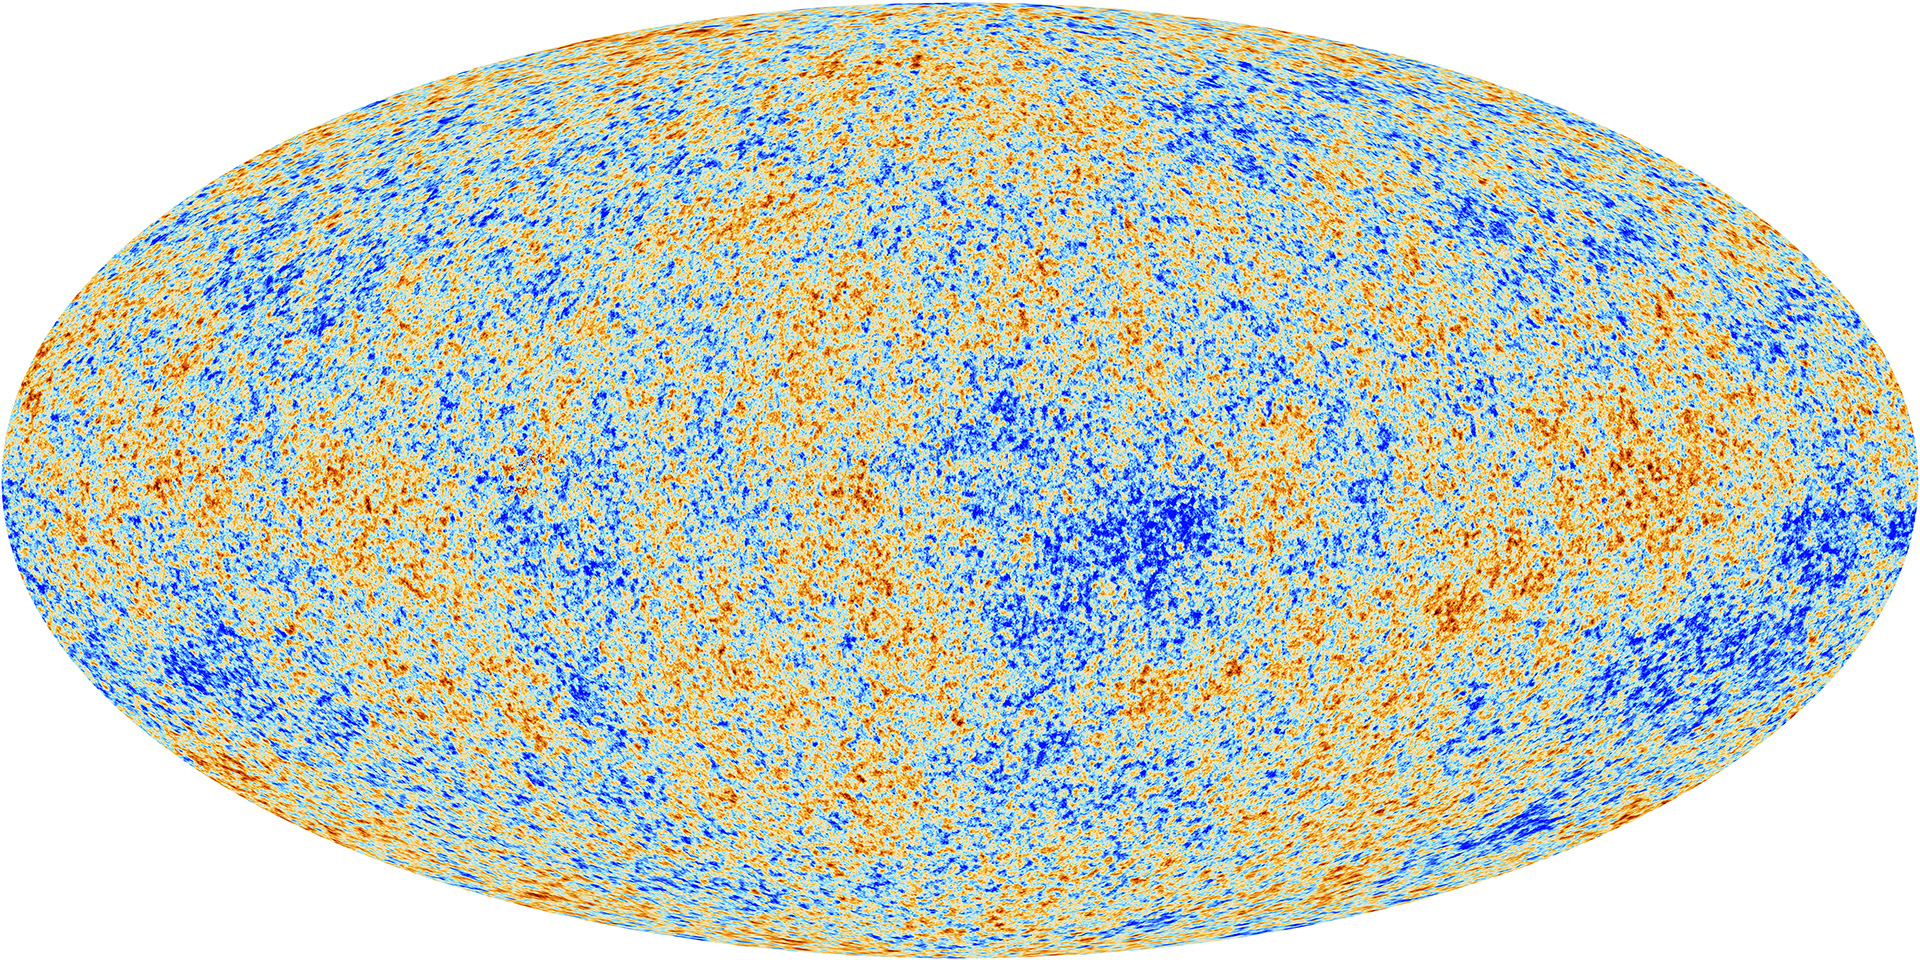

In [22]:
display(Image(filename="Planck_CMB.jpg"))

by projecting the data on the different harmonics. Since what we are plotting is the difference in temperature from the average CMB temperature, we have:

$$\delta T(\hat{n}) = \sum_{l=0}^{\infty}\sum_{m=-l}^{l}a_{lm}Y_{lm}(\hat{n})$$

But the universe IS symmetric to rotations, so its properties cannot depend on 2 angles, or indexes. That is, the coefficients do not depend on l and m, but only in l. Usually what we represent is no $a_{lm}$, but some quantities more directly related to the measurements of our instruments:

$$C_l = \frac{1}{2l+1}\sum_{m=-l}^{l}a^2_{lm}$$

Since these quantities go as the square of the amplitudes, they indicate how much power the signal has at each scale defined by l. If we measure that power as a function of the scale l, we get what we call the power spectrum of the CMB:

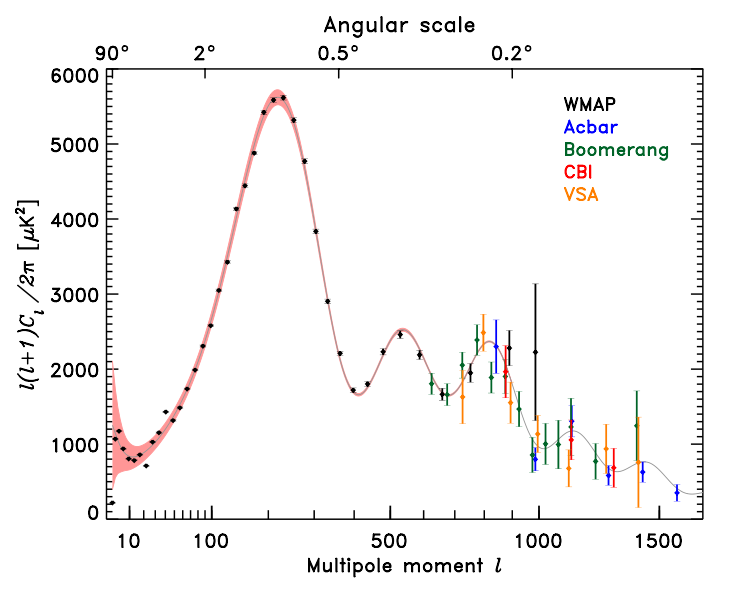

In [24]:
display(Image(filename="733px-PowerSpectrumExt.png"))

This graph basically tells us that there is different power on different scales 

$\theta \approx \frac{180\deg}{l}$

different physical processes will generate different levels of perturbations. But before discussing those, focus on how well our model fits the measurements, whithin error bars. The error bars make reference to measurement errors due to the limited precission of our instruments, as well as potential systematics in the measurement procedures. The shaded area has a different meaning, and we need to review some statistical concepts to explain it

# Cosmic variance

Let's think of stochastic processes, that is, processes that generate numbers randomnly. The probability distribution function tells us how probable is one value of those numbers to be generated by the process. The most famous pdf is by far the Gaussian (bell) curve:

$p(x|\mu,\sigma)=\frac{1}{\sigma \sqrt{2\pi}}\exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$

it is fully determined by the value of 2 numbers, $\mu$ and $\sigma$, what is their meaning?

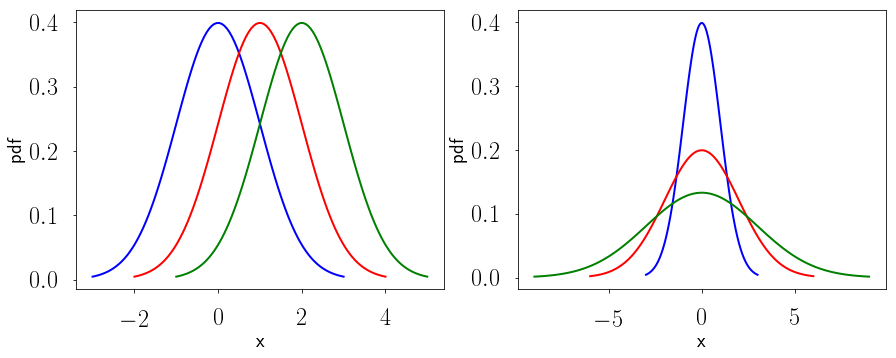

In [6]:
# Prepare plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot((121))
ax1.set_xlabel('x')
ax1.set_ylabel('pdf')
ax2 = fig.add_subplot((122))
ax2.set_xlabel('x')
ax2.set_ylabel('pdf')

# First, different means
means = [0.0, 1.0, 2.0]
colors = ['b', 'r', 'g']
sigma = 1.0
for i in range(len(means)):
    mean = means[i]
    x = np.linspace(mean-3*sigma, mean+3*sigma, 100)
    y = np.exp(-(x-mean)**2/(2.0*sigma**2)) / (sigma*np.sqrt(2.0*np.pi))
    ax1.plot(x,y,c=colors[i])
# Second, different standard deviations
mean = 0.0
sigmas = [1.0, 2.0, 3.0]
for i in range(len(sigmas)):
    sigma = sigmas[i]
    x = np.linspace(mean-3*sigma, mean+3*sigma, 100)
    y = np.exp(-(x-mean)**2/(2.0*sigma**2)) / (sigma*np.sqrt(2.0*np.pi))
    ax2.plot(x,y,c=colors[i])
    

And how do real data look like?

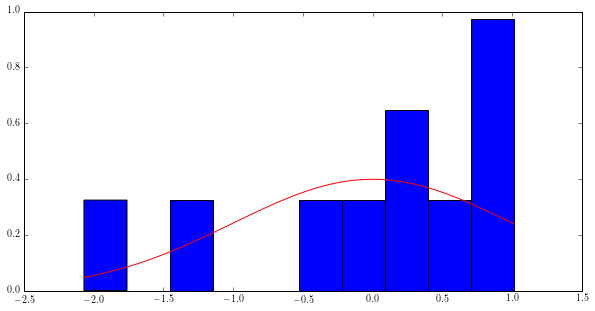

In [65]:
# Let's sample some points from a Gaussian pdf:
N = 10
mu = 0.0
sigma = 1.0
x = np.random.normal(loc=mu,scale=sigma,size=N)
# Let's compute the theoretical pdf
xth = np.linspace(np.min(x),np.max(x),100)
yth = np.exp(-(xth-mu)**2/(2.0*sigma**2)) / (sigma*np.sqrt(2.0*np.pi))
# And let's plot its histogram and theoretical prediction
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(xth,yth,'r-')
histogram = ax.hist(x,bins=np.max([10,int(np.sqrt(N))]),normed=True)

Each time we sample the same distribution, we get a somewhat different histogram. In general, we never have access to the "true" underlying pdf (red line), but to the actual sampled data (blue histogram). When we estimate the parameters, $\hat{\mu}$ and $\hat{\sigma}$ from the sample, in general we do not recover the "true" values, but we get closer the more points we use ("Central Limit Theorem").

The relative error shrinks as:

$\propto \frac{1}{\sqrt{N}}$

We think the perturbations in the CMB are generated by quantum perturbations and thus have a stochastic character. It is as if the laws of physics determined the mean and the variance of our Gaussian random generator, but in each realization of these laws (universe) there is an independent realization from the underlying distribution (cosmic variance).

Since the universe is symmetric to roations, each $C_l$ combines $a_{lm}$ for different values of $m$, in particular, each mode $l$ is the result of combining $2l+1$ $m$ modes. Thus the uncertainty (cosmic variance) at low $l$ values (multipoles) is relatively large, and there is little cosmological information on those modes. At small scales / high $l$, the statistical uncertainty is small, and we can use that information to constrain cosmology. 

# Physical origin of CMB perturbations

We can distinguish primordial and secondary perturbations. In general, the secondary perturbations are corrections to the primordial ones so we will focus on the first.

Looking at the large error bars at large scales, the measured power spectrum is consistent with a scale-invariant field, that is, the same power at all scales (flat curve, white noise). This corresponds to the predictions from the simplest inflationary models.

This changes at a scale of $l\approx200$, corresponding to $\approx 1 \deg$, where there is a large peak, followed by a set of smaller, somewhat damped peaks.

# Primordial perturbations: the horizon

The horizon is the distance that defines which regions in space-time are causally connected to a specific point. Since nothing moves faster than the speed of light -which is the speed of signals-, it defines the size of the horizon.

At any point in space-time, we only need to measure the length a photon travels in a straight line since the Big Bang, since nothing beyond that distance will have had enough time to enter in casual contact. At recombination this distance is given by

$l_h = a(t_{rec})\int_0^{t_{rec}}\frac{cdt}{a(t)}=\int_{z_{rec}}^\infty \frac{cdz}{H(z)}$

This distance is not directly observable to us, since we are not at recombination, but if we know the physical distance that separates us from that event, we can measure the angle on the sky that that horizon subtended:

$d_A = \int_0^{z_{rec}}\frac{cdz}{H(z)}$

And so

$\delta \theta_h = \frac{l_h}{d_A}$

The change in the hubble parameter as a function of redshift depends on the energy-content of the universe. In a flat universe with radiation, matter and a cosmological constant, we have:

$\delta \theta_h = \frac{\int_{z_{rec}}^\infty\frac{dz}{\sqrt{\Omega_{\Lambda}+\Omega_m(1+z)^3+\Omega_r(1+z)^4}}}{\int_0^{z_{rec}}\frac{dz}{\sqrt{\Omega_{\Lambda}+\Omega_m(1+z)^3+\Omega_r(1+z)^4}}}$

Numerically, with the best estimates we currently have for the parameters, we obtain a value of $\delta \Omega_h \approx 1 \deg$, or $l\approx 200$

This poses 2 questions:

1. As we saw first, the CMB is extremely homogeneous, meaning points at distances larger than the horizon exhibit the same temperature. But these points where never in causal contact, why were the initial conditions of the universe that homogeneous? This is known as the horizon problem.

2. Although extremely homogeneous, there are perturbations at small scales -the power spectrum is not zero-. What determines the amplitude and distribution of those?

Let's assume all photons that decouple do so at the same energy -just below the H ionizing threshold-. Then, the temperature of the CMB should be constant. If there are differences in density, at scales larger than the horizon, then these photons see a different gravitational fields -or space-time curvature-, depending on where they become decoupled. Photons coming from denser areas, need to exit deeper gravitational wells to reach us, and will be more gravitationally redshifted. As a result, big cold spots represent over-dense regions, while big hot spots represent under-dense regions. This is known as the Sachs-Wolfe effect.

Alternatively, just before decoupling, denser regions have a higher density of photons, which translates into a higher temperature. These are called "adiabatic perturbations".

The pattern of temperature spots of the CMB that are larger than ~1deg are the result of the combination of both processes. But Sachs-Wolfe dominates

Both require some inhomogeneities in density. We will discuss, when we talk about inflation, what could be the origin of those

# Primordial perturbations: acoustic oscillations

Which processes are responsible for the smaller, sub-horizon anisotropies?

Before photon baryon decoupling, both form a plasma where differences in density would tend to be smoothed out by pressure waves traveling at the local speed of sound.

The baryons in that plasma, see potential wells generated by the collapse of dark matter overdensities -more on that when we discuss structure formation and dark matter-, so they tend to fall into them.

When falling into those potential wells, they compress and heat, expanding then in a "sloshing" movement.

As the photons decouple, we see a "snapshot" of that sloshing.

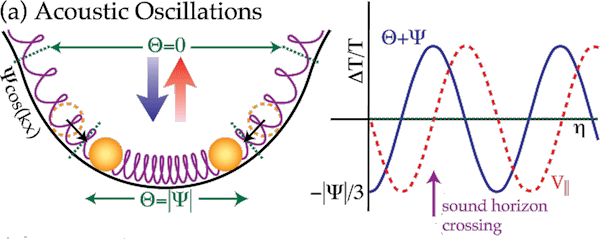

In [67]:
display(Image(filename="acoustic.png"))

As with any oscillator, its properties depend on the masses involved, this is very sensitive to the baryon density

## Secondary perturbations

- Integrated Sachs-Wolfe
- Doppler effect
- Sunyaev-Zeldovich (Thermal & Kinematic)
- Lensing